In [1]:
import numpy as np
import pandas as pd
import os

print('Number of files in the train set: ' + str(len(os.listdir('train'))))
print('Number of files in the test set: ' + str(len(os.listdir('test'))))

Number of files in the train set: 2295
Number of files in the test set: 1531


In [2]:
train_labels = pd.read_csv('train_labels.csv')
train_labels.head()

,name,invasive
0,1,0
1,2,0
2,3,1
3,4,0
4,5,1


In [3]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission.head()

,name,invasive
0,1,0.5
1,2,0.5
2,3,0.5
3,4,0.5
4,5,0.5


In [4]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tqdm import tqdm

X_train, X_test = [], []

for i in tqdm(train_labels.name):
    img = load_img('train/{}.jpg'.format(i), target_size=(150,200))
    img = img_to_array(img)
    X_train.append(img)

Using TensorFlow backend.
100%|██████████| 2295/2295 [00:59<00:00, 39.14it/s]


In [5]:
X_train[0].shape

(150, 200, 3)

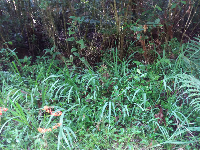

In [6]:
array_to_img(X_train[0])

In [7]:
for i in tqdm(sample_submission.name):
    img = load_img('test/{}.jpg'.format(i), target_size=(150,200))
    img = img_to_array(img)
    X_test.append(img)

100%|██████████| 1531/1531 [00:38<00:00, 39.41it/s]


In [8]:
X_train = np.array(X_train, np.float32) / 255
y_train = np.array(train_labels.invasive)
X_test = np.array(X_test, np.float32) / 255

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(2295, 150, 200, 3)
(2295,)
(1531, 150, 200, 3)


In [53]:
y_tr[:10]

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1])

In [9]:
from sklearn.model_selection import train_test_split

X_tr, X_te, y_tr, y_te = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

print(X_tr.shape)
print(y_tr.shape)
print(X_te.shape)
print(y_te.shape)

(1836, 150, 200, 3)
(1836,)
(459, 150, 200, 3)
(459,)


In [10]:
y_tr[:10]

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1])

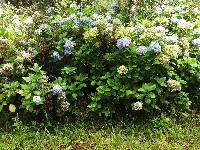

In [11]:
array_to_img(X_tr[2])

In [12]:
from keras.models import Sequential, Model, load_model
from keras import applications
from keras import optimizers
from keras.layers import Dropout, Flatten, Dense

base_model = applications.VGG16(weights='imagenet', include_top=False, input_shape=(150, 200, 3))

In [13]:
add_model = Sequential()
add_model.add(Flatten(input_shape=base_model.output_shape[1:]))
add_model.add(Dense(256, activation='relu'))
add_model.add(Dense(1, activation='sigmoid'))

model = Model(inputs=base_model.input, outputs=add_model(base_model.output))
model.compile(loss='binary_crossentropy', optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

In [14]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

batch_size = 32
epochs = 20

train_datagen = ImageDataGenerator(
        rotation_range=30, 
        width_shift_range=0.1,
        height_shift_range=0.1, 
        horizontal_flip=True)
train_datagen.fit(X_tr)
fx
history = model.fit_generator(
    train_datagen.flow(X_tr, y_tr, batch_size=batch_size),
    steps_per_epoch=X_tr.shape[0] // batch_size, epochs=epochs,
    validation_data=(X_te, y_te),
    callbacks=[ModelCheckpoint('vgg16.model', monitor='val_acc', save_best_only=True)])

Epoch 1/20
57/57 [==============================] - 876s - loss: 0.6164 - acc: 0.6557 - val_loss: 0.4993 - val_acc: 0.6928

In [79]:
y_pred = model.predict(X_test)

In [80]:
sub = pd.read_csv('sample_submission.csv')
name = sub['name']

output = pd.DataFrame({'name': name, 'invasive': y_pred.ravel()})
output.to_csv('submission.csv', index=False)

In [81]:
output.head()

,invasive,name
0,0.987906,1
1,0.004571,2
2,0.019665,3
3,0.001499,4
4,0.997224,5


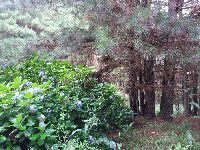

In [112]:
test_img = load_img('test/1.jpg', target_size=(150,200))
test_img

In [113]:
test_img = img_to_array(test_img)
test_img = test_img.reshape((1,) + test_img.shape) / 255
model.predict(test_img)

array([[ 0.9879055]], dtype=float32)

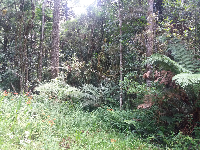

In [114]:
test_img = load_img('test/2.jpg', target_size=(150,200))
test_img

In [115]:
test_img = img_to_array(test_img)
test_img = test_img.reshape((1,) + test_img.shape) / 255
model.predict(test_img)

array([[ 0.0045706]], dtype=float32)

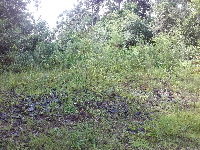

In [122]:
test_img = load_img('test/3.jpg', target_size=(150,200))
test_img

In [123]:
test_img = img_to_array(test_img)
test_img = test_img.reshape((1,) + test_img.shape) / 255
model.predict(test_img)

array([[ 0.01966507]], dtype=float32)

In [1]:
from keras.models import load_model

model_from_file = load_model('vgg16.model')

Using TensorFlow backend.


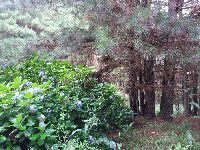

In [3]:
from keras.preprocessing.image import img_to_array, load_img

test_img = load_img('test/1.jpg', target_size=(150,200))
test_img

In [4]:
test_img = img_to_array(test_img)
test_img = test_img.reshape((1,) + test_img.shape) / 255
model_from_file.predict(test_img)

array([[ 0.99739301]], dtype=float32)

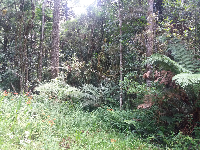

In [5]:
test_img = load_img('test/2.jpg', target_size=(150,200))
test_img

In [6]:
test_img = img_to_array(test_img)
test_img = test_img.reshape((1,) + test_img.shape) / 255
model_from_file.predict(test_img)

array([[ 0.02404784]], dtype=float32)

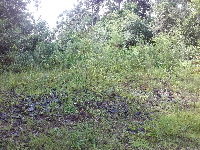

In [7]:
test_img = load_img('test/3.jpg', target_size=(150,200))
test_img

In [8]:
test_img = img_to_array(test_img)
test_img = test_img.reshape((1,) + test_img.shape) / 255
model_from_file.predict(test_img)

array([[ 0.06081858]], dtype=float32)